In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
import rasterio as rio
from pathlib import Path
import os

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

from src import *


plt.rcParams["figure.figsize"] = (20,10)
GPU_IDX = 0

def show(tensor,*args,**kwargs):   
    while len(tensor.shape)>3:
        tensor=tensor[0]
    plt.imshow(tensor.permute(1,2,0).detach().cpu(),*args,**kwargs)

In [4]:
import imageio

rgb_img = imageio.imread('imgs/rgb_example.png')[...,:3]/255

# to tensor (B,C,H,W)
rgb_img = torch.FloatTensor(rgb_img).permute(2,0,1)

C:\Users\thoma\AppData\Local\Temp\ipykernel_5136\2539462654.py:3: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  rgb_img = imageio.imread('imgs/rgb_example.png')[...,:3]/255


In [5]:
b_img=rgb_img.expand(4,3,256,256)
cl, cmask, smask = add_cloud_and_shadow(b_img,
                                        return_cloud=True
                                       )

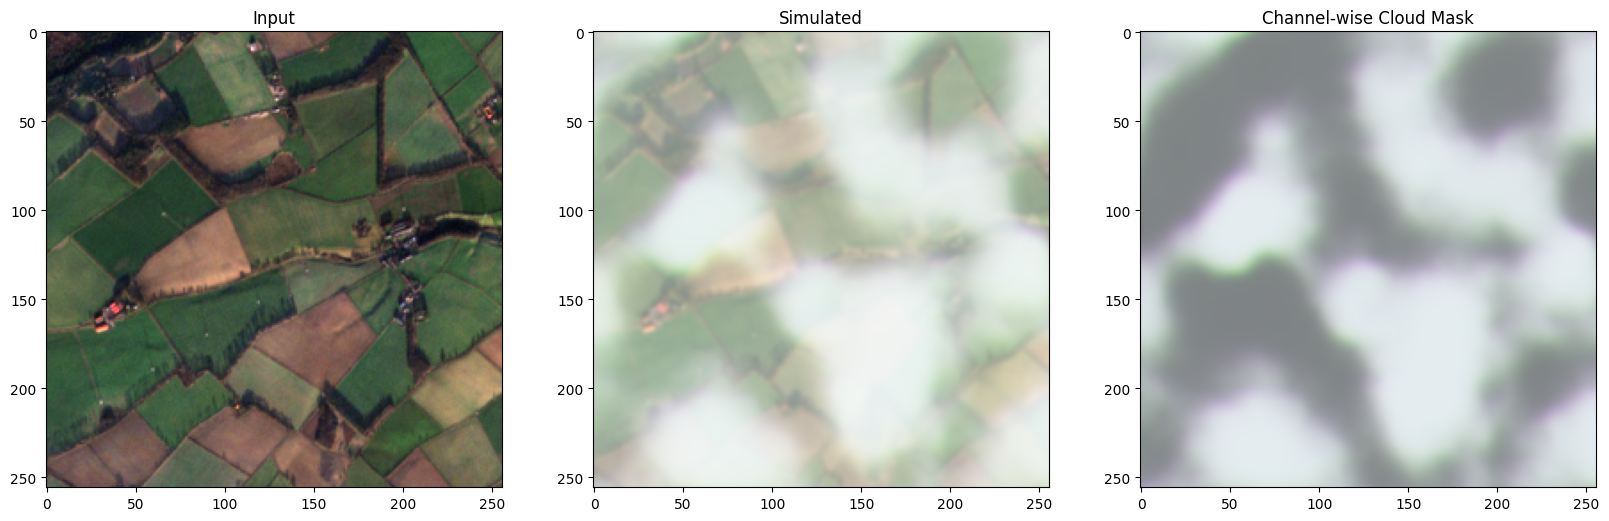

In [20]:
cl, mask = add_cloud(rgb_img,
                     min_lvl=0.5,
                     max_lvl=0.9,
                     decay_factor=1.85,
                     return_cloud=True)

plt.subplot(1,3,1)
show(rgb_img)
plt.title('Input')
plt.subplot(1,3,2)
show(cl)
plt.title('Simulated')
plt.subplot(1,3,3)
show(mask)
plt.title('Channel-wise Cloud Mask')

plt.savefig('imgs/foggy_cloud.png',
        dpi=200, 
        bbox_inches='tight',
        pad_inches=0.0
       )

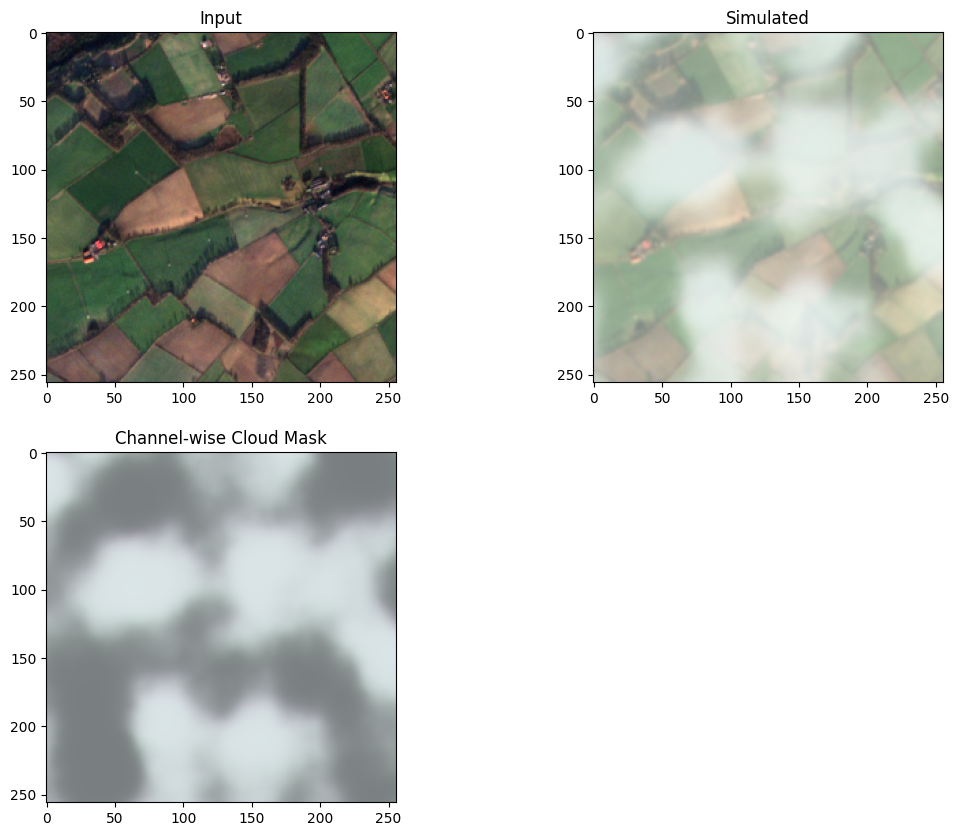

In [8]:
n=5

for i in range(n):
    cl, mask = add_cloud(rgb_img,
                     min_lvl=0+(i+1)/n,
                     max_lvl=0+(i+1)/n,
                     decay_factor=1.85,
                     return_cloud=True)

    plt.subplot(n,3,1+i)
    show(rgb_img)
    plt.title('Input')
    plt.subplot(n,3,2+i)
    show(cl)
    plt.title('Simulated')
    plt.subplot(n,3,3+i)
    show(mask)
    plt.title('Channel-wise Cloud Mask')

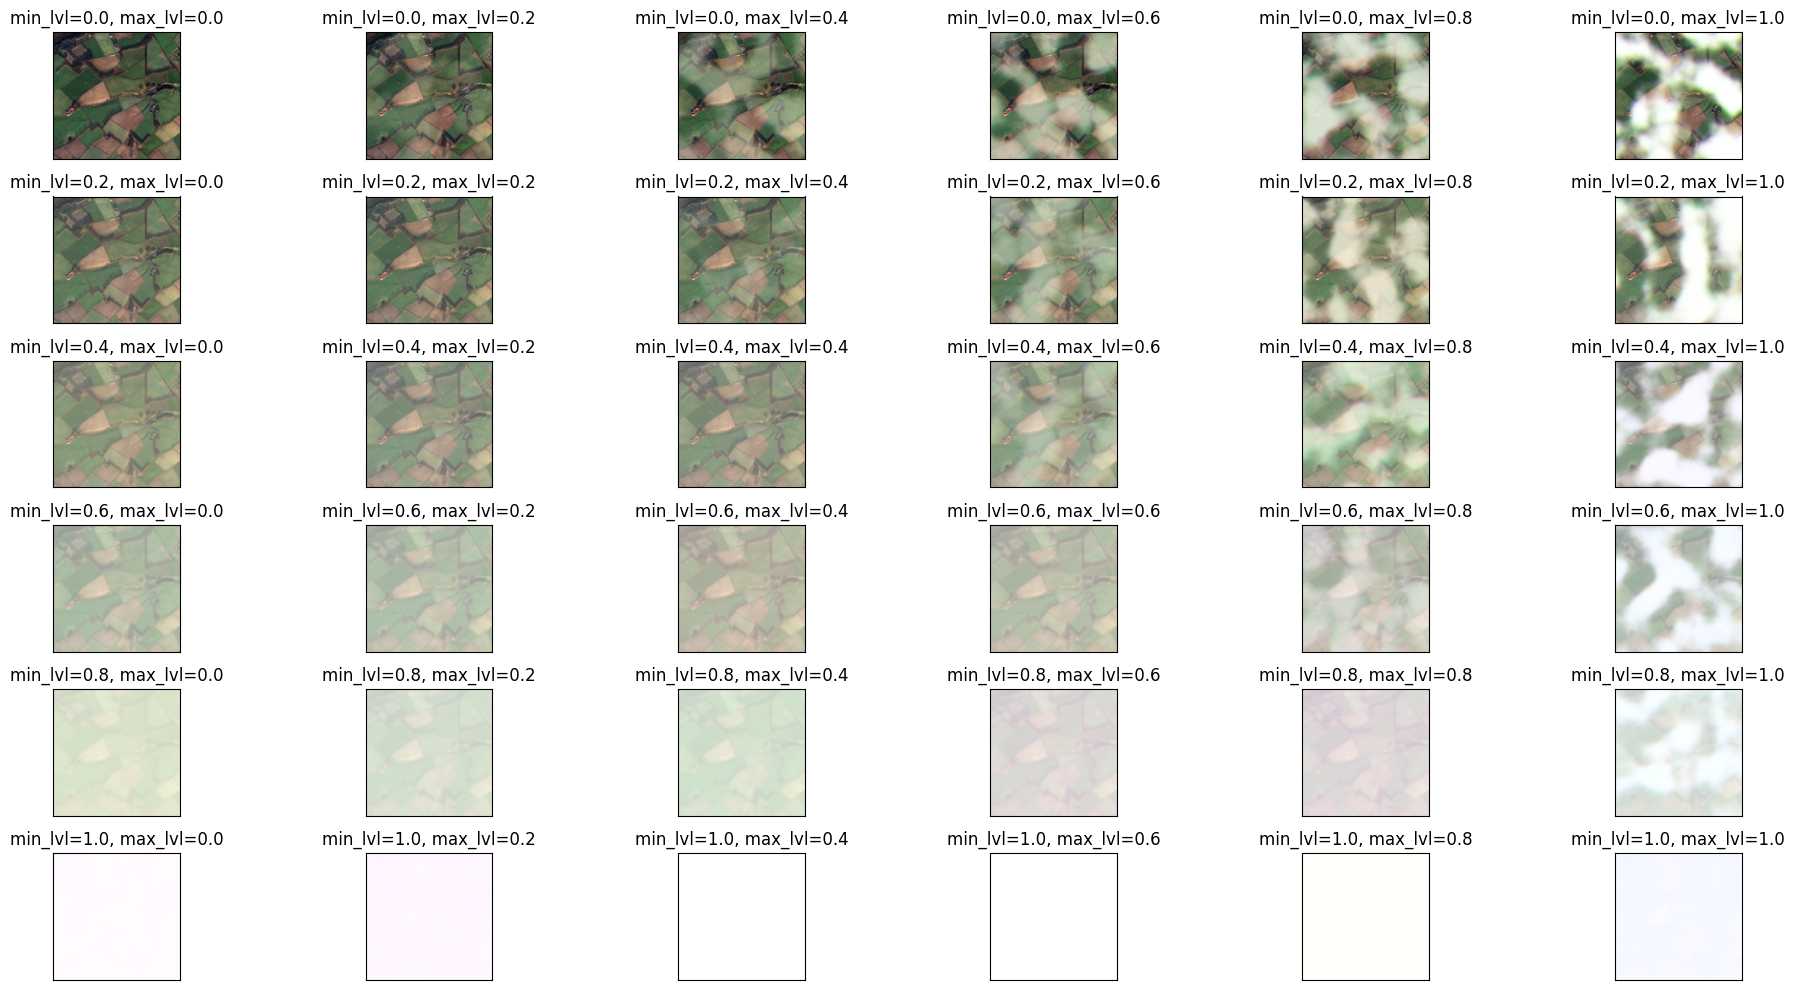

In [8]:
import textwrap

n = 5
m = 0

for i in range(n + 1):
    for j in range(n + 1):
        cl, mask = add_cloud(rgb_img,
                             min_lvl=(i) / n,
                             max_lvl=(j) / n,
                             decay_factor=1.85,
                             return_cloud=True)

        m = m + 1
        plt.subplot(n + 1, n + 1, m)
        plt.xticks([])
        plt.yticks([])
        plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False,
                        labelbottom=False, labelleft=False)

        # Generate a title with text wrapping
        title_text = f'min_lvl={i/n}, max_lvl={j/n}'
        wrapped_title = textwrap.fill(title_text, width=26)  # Adjust the width as needed
        plt.title(wrapped_title)

        show(cl)

# Adjust layout to prevent overlapping titles
plt.tight_layout()

# Show the entire plot
plt.show()


In [28]:
import textwrap

n = 5
m = 0

for i in range(n + 1):
    for j in range(n + 1):
        v1 = i/n
        v2 = j/n
        cl, mask = add_cloud(rgb_img,
                             min_lvl=0.2,
                             max_lvl=0.6,
                             decay_factor=v1,
                             blur_scaling=v2,
                             shadow_max_lvl = 0.2,
                             return_cloud=True)

        m = m + 1
        plt.subplot(n + 1, n + 1, m)
        plt.xticks([])
        plt.yticks([])
        plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False,
                        labelbottom=False, labelleft=False)

        # Generate a title with text wrapping
        title_text = f'min_lvl={i/n}, max_lvl={j/n}'
        wrapped_title = textwrap.fill(title_text, width=30)  # Adjust the width as needed
        plt.title(wrapped_title)

        show(cl)

# Adjust layout to prevent overlapping titles
plt.tight_layout()

# Show the entire plot
plt.show()


TypeError: add_cloud() got an unexpected keyword argument 'shadow_max_lvl'

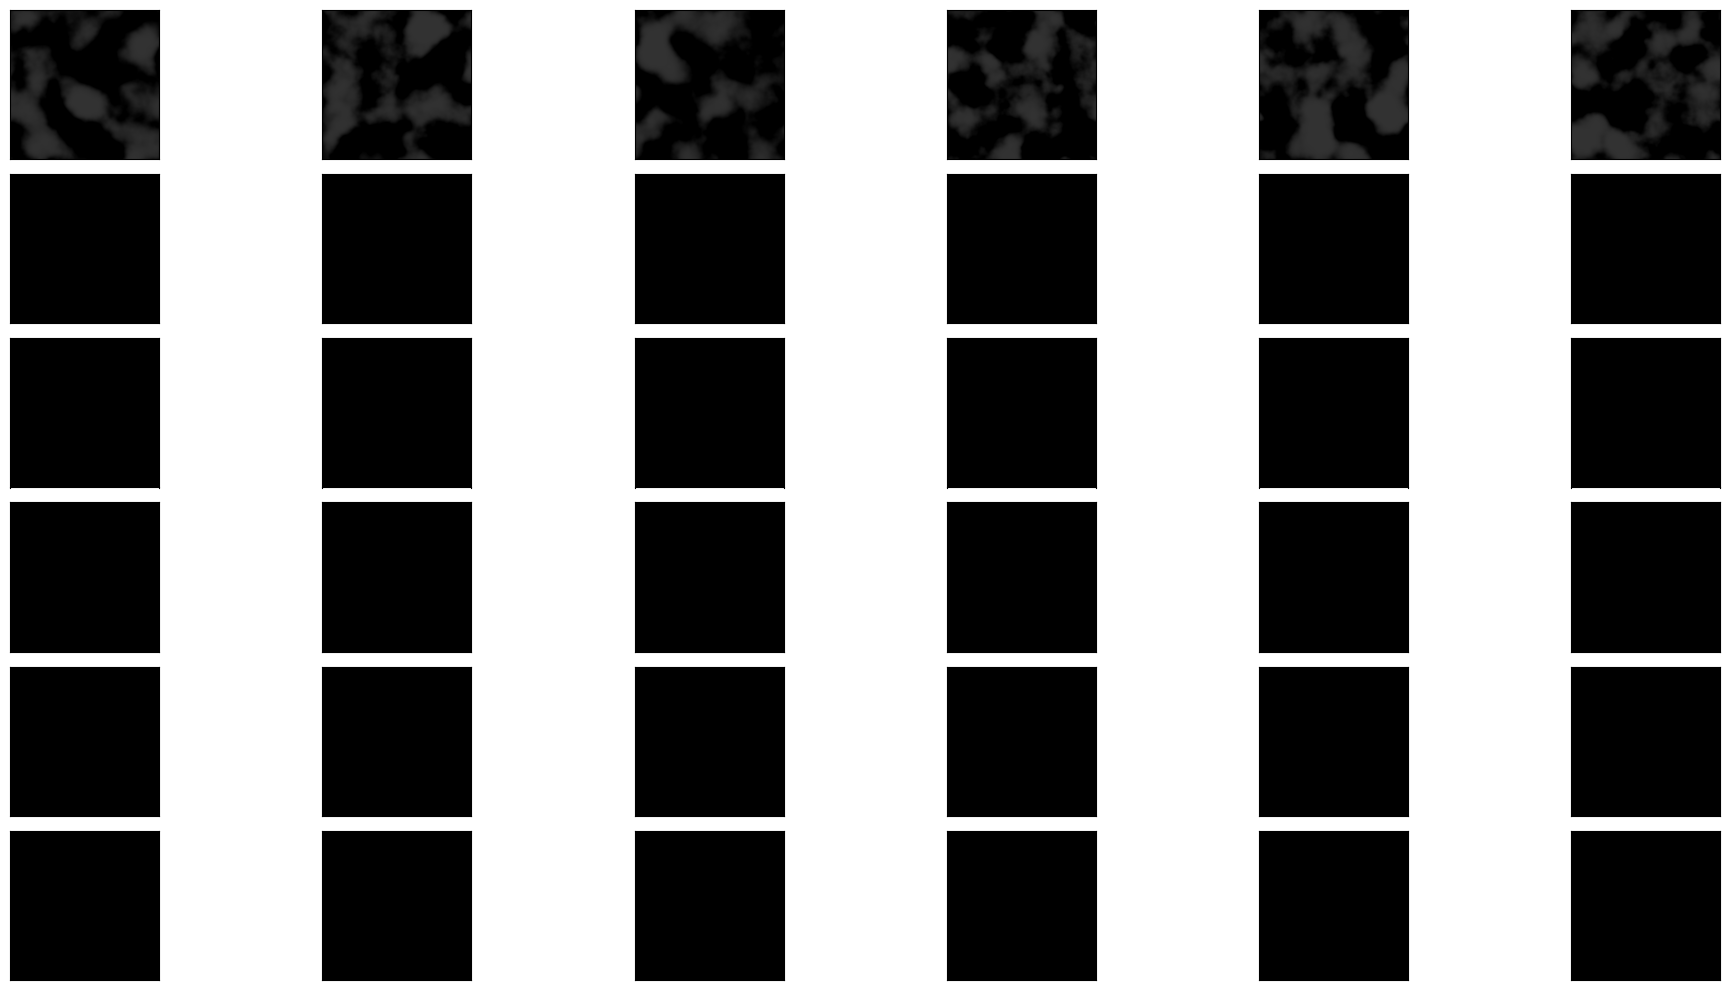

In [42]:
import textwrap

n = 5
m = 0

for i in range(n + 1):
    for j in range(n + 1):
        cl, cmask, smask = add_cloud_and_shadow(rgb_img,
                             min_lvl=(i) / n,
                             max_lvl=(j) / n,
                             decay_factor=0.8,
                             shadow_max_lvl=0.2,
                             return_cloud=True)

        m = m + 1
        plt.subplot(n + 1, n + 1, m)
        plt.xticks([])
        plt.yticks([])
        plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False,
                        labelbottom=False, labelleft=False)

        # Generate a title with text wrapping
        #title_text = f'min_lvl={i/n}, max_lvl={j/n}'
        #wrapped_title = textwrap.fill(title_text, width=26)  # Adjust the width as needed
        #plt.title(wrapped_title)
        show(smask)

# Adjust layout to prevent overlapping titles
plt.tight_layout()

# Show the entire plot
plt.show()

# Multi-Spectral Data
While the magnitude of the clouds is quite comparable in the RGB bands (since they appear in approximately white colour), the relationship between the cloud strength and channel frequency is generally more complex.

As an example, let's open an example file containing 12 bands from Sentinel-2 L1C (except for Band 10, which often interacts with the clouds quite differently).

In [6]:
imgPath = r'C:\Users\thoma\AIML2024Summer\LC09_L1TP_114063_20240112_20240112_02_T1\LC09_L1TP_114063_20240112_20240112_02_T1_B1.TIF'

In [7]:
with rio.open(imgPath, 'r') as f:
    uint16_array = f.read()

RasterioIOError: C:/Users/thoma/AIML2024Summer/LC09_L1TP_114063_20240112_20240112_02_T1/LC09_L1TP_114063_20240112_20240112_02_T1_B1.TIF: No such file or directory

In [ ]:
uint16_array

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]], dtype=uint16)

In [25]:
int16_array = uint16_array.astype(np.int16)

In [26]:
int16_array

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]], dtype=int16)

In [28]:
clean=torch.from_numpy(int16_array)
    
cloudy=torch.from_numpy(int16_array)

# Mask values: 0 - clear, 1 - cloudy, 2 - shadow,
mask=torch.from_numpy(int16_array)

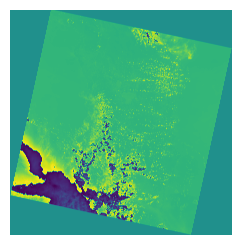

In [29]:
for idx,img in enumerate(cloudy):
    plt.subplot(2,6,1+idx)
    plt.imshow(img)
    plt.axis('off')

In [10]:
i = 11

imgPath = f"C:\\Users\\thoma\\AIML2024Summer\\datasets\\Landsat-9-Level-1\\products\\LC09_L1TP_114063_20240112_20240112_02_T1\\LC09_L1TP_114063_20240112_20240112_02_T1_B{i}.TIF"
rawPath = rf"{imgPath}"

with rio.open(rawPath, 'r') as f:
    uint16_array = f.read()

int16_array = uint16_array.astype(np.int16)
int16_array

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]], dtype=int16)

In [11]:
clean=torch.from_numpy(int16_array)
    
cloudy=torch.from_numpy(int16_array)

# Mask values: 0 - clear, 1 - cloudy, 2 - shadow,
mask=torch.from_numpy(int16_array)

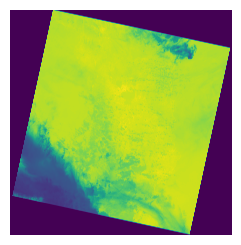

In [12]:
for idx,img in enumerate(cloudy):
    plt.subplot(2,6,1+idx)
    plt.imshow(img)
    plt.axis('off')

In [50]:
cloudy

tensor([[[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]]], dtype=torch.int16)

In [58]:

# Create two NumPy arrays
array1 = np.array([1, 2, 3])
array2 = np.array([4, 5, 6])

# Append array2 to array1
result_array = np.append(array1, array2)

print("Array 1:", array1)
print("Array 2:", array2)
print("Result Array:", result_array)


Array 1: [1 2 3]
Array 2: [4 5 6]
Result Array: [1 2 3 4 5 6]


# compute and identifys clouds

In [13]:
cloudyimgs = []


In [14]:
for i in range(1,12):
    imgPath = f"C:\\Users\\thoma\\AIML2024Summer\\datasets\\Landsat-9-Level-1\\products\\LC09_L1TP_114063_20240112_20240112_02_T1\\LC09_L1TP_114063_20240112_20240112_02_T1_B{i}.TIF"
    rawPath = rf"{imgPath}"
    
    with rio.open(rawPath, 'r') as f:
        uint16_array = f.read()
    
    int16_array = uint16_array.astype(np.int16)

    cloudy=torch.from_numpy(int16_array)

    cloudyimgs.append(cloudy)


In [15]:
cloudyimgs

[tensor([[[0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          ...,
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0]]], dtype=torch.int16),
 tensor([[[0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          ...,
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0]]], dtype=torch.int16),
 tensor([[[0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          ...,
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0]]], dtype=torch.int16),
 tensor([[[0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          ...,
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0]]], dtype=to

# plots clouds 

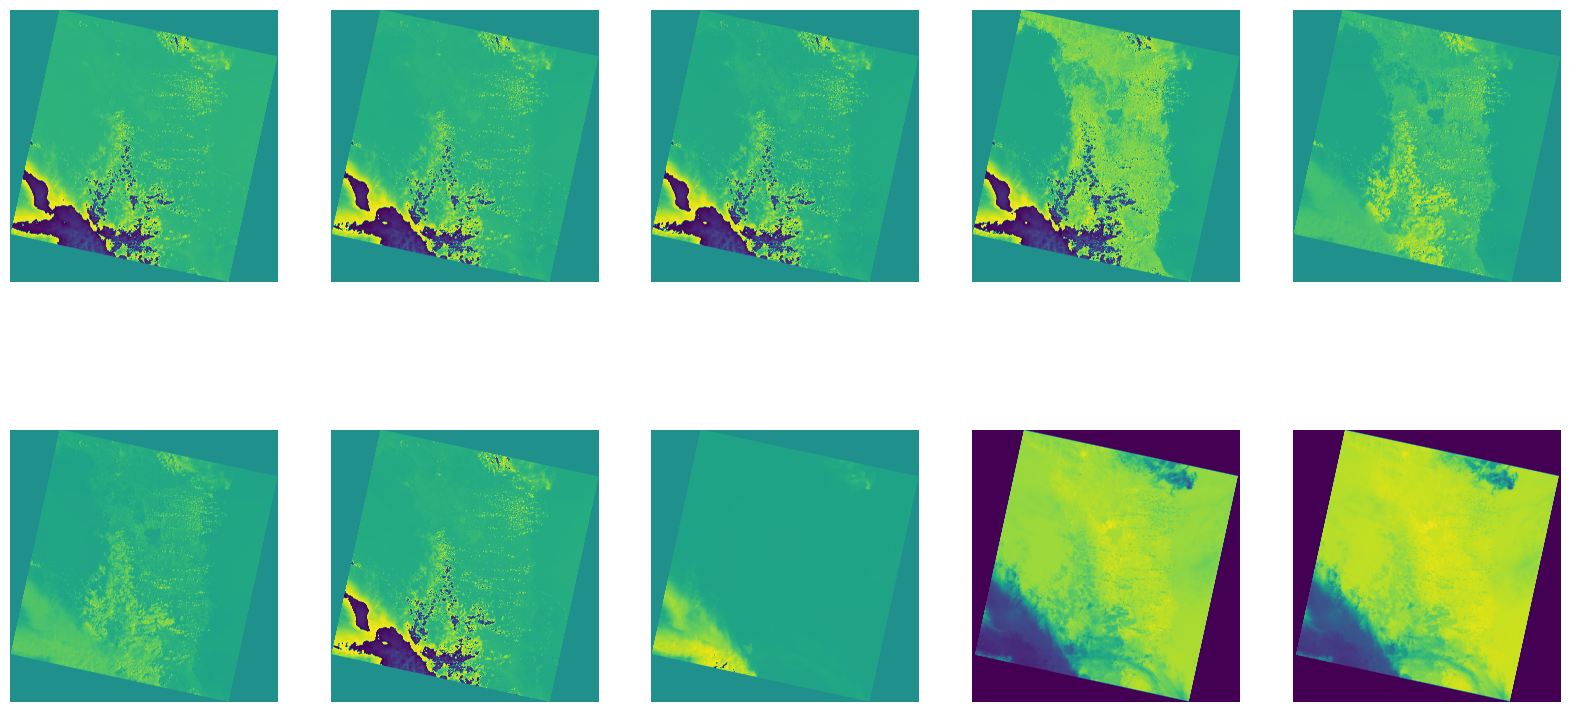

In [16]:
#plot hyperspectral img
for i in range(1,11):
    for idx, img in enumerate(cloudyimgs[i]):
            plt.subplot(2,5,i)
            plt.imshow(img, cmap='viridis')
            plt.axis('off')

In [8]:
for i in range(1,12):
    print(i)

1
2
3
4
5
6
7
8
9
10
11


In [17]:
rgbimg=[]
for i in range(4,1,-1):
    for idx, img in enumerate(cloudyimgs[i]):
        rgbimg.append(img)

In [18]:
rgbimg

[tensor([[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]], dtype=torch.int16),
 tensor([[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]], dtype=torch.int16),
 tensor([[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]], dtype=torch.int16)]

TypeError: Invalid shape (7621, 3, 7761) for image data

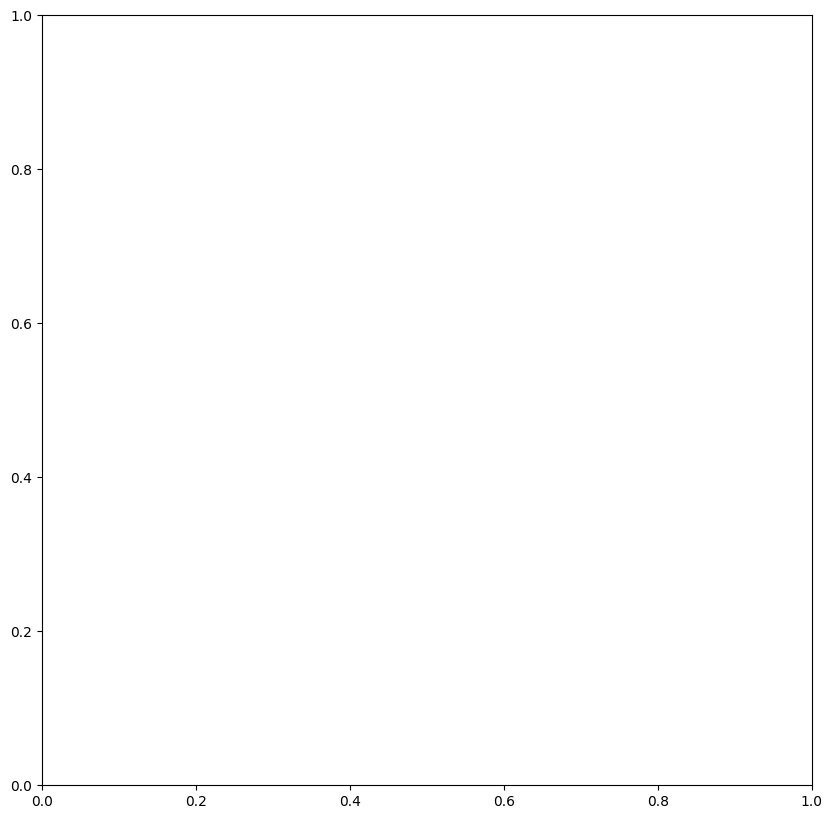

In [20]:
rgbimg = np.transpose(rgbimg, (1,2,0))
plt.imshow(rgbimg)
plt.axis('off')

In [7]:
out=add_cloud(clean,
              locality_degree=2,
              channel_magnitude=cmags)

for idx,img in enumerate(out[0]):
    plt.subplot(2,6,1+idx)
    plt.imshow(img)
    plt.axis('off')

NameError: name 'cmags' is not defined

# compute, identifys clouds and plots

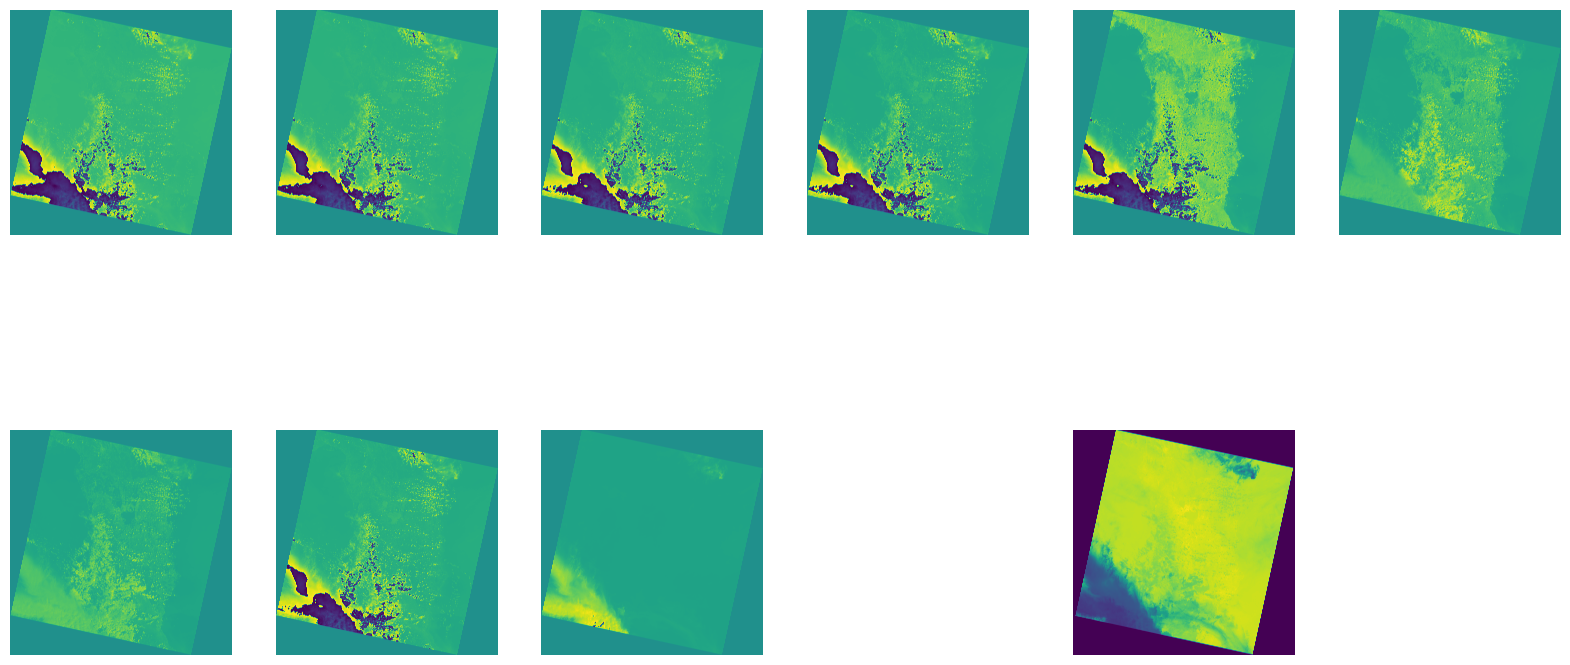

In [59]:
for i in range(1,12):
    if i != 10:
        imgPath = f"C:\\Users\\thoma\\AIML2024Summer\\LC09_L1TP_114063_20240112_20240112_02_T1\\LC09_L1TP_114063_20240112_20240112_02_T1_B{i}.TIF"
        rawPath = rf"{imgPath}"
        
        with rio.open(rawPath, 'r') as f:
            uint16_array = f.read()
        
        int16_array = uint16_array.astype(np.int16)

        cloudy=torch.from_numpy(int16_array)
        
        for idx, img in enumerate(cloudy):
                plt.subplot(2,6,i)
                plt.imshow(img, cmap='viridis')
                plt.axis('off')
            
